Below is the code and output from my first homework assignment from my Applied Deep Learning course from my Master's in Data Science program from Columbia University (from the Fall semester of 2022). Please note that this notebook is not maintained, so it may not run correctly for someone else.

**Assignment 1**

## About
In this assignment, you will gain experience implementing a linear model, a neural network, and a deep neural network using TensorFlow 2.0. 

* You will use two different development styles. I thought it’d be helpful for you to see both of these early (if you’re familiar with them, you can branch out to any major framework that exist today). 

* Along the way, you'll add code to visualize the weights of a linear model, and provide your own implementation of softmax (so you learn to extend the built-in functionality right off the bat).

This assignment has several parts, plan ahead and get started early (and come to office hours if you’re stuck, the CAs are happy to help).

## Instructions

Complete the code in this notebook by searching for the text **"TODO"**.

## Submission instructions

Please submit this assignment on CourseWorks by uploading a Jupyter notebook that includes saved output. If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Resources

You can find all the latest tutorials for TensorFlow 2.0 [here](https://www.tensorflow.org/tutorials). Code examples that will help you with each part of the assignment are linked below.



---



## Setup

### Install TensorFlow 2.0

The most recent version of TensorFlow is alreadey installed in Colab. If you prefer working in Jupyter locally, you will need to install TensorFlow following these [instructions](http://tensorflow.org/install).

### Check which TF version is installed
It's good practice to check which version you have installed.

In [1]:
# IMPORTS
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [3]:
# GET DATASET AND SPLIT
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# SCALE PIXEL DATA
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


### Define, train, and evaluate a linear model

In [4]:
# SIMPLE CLASSIFICATION MODEL
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax') #SOFTMAX FOR PROBS
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4714 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3047 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.9265


[0.26728391647338867, 0.9265000224113464]

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this. You can find additional example code [here](https://www.tensorflow.org/tutorials/keras/text_classification).

![Plot of loss](https://storage.googleapis.com/applied-dl/a1-1.png)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4668 - accuracy: 0.8791 - val_loss: 0.3060 - val_accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9153 - val_loss: 0.2813 - val_accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9212 - val_loss: 0.2721 - val_accuracy: 0.9241
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9246 - val_loss: 0.2669 - val_accuracy: 0.9253
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9265 - val_loss: 0.2678 - val_accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9269 - val_loss: 0.2661 - val_accuracy: 0.9251
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9287 - val_loss: 0.2626 - val_accuracy:

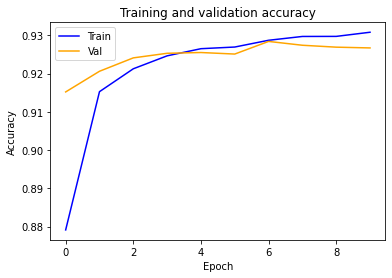

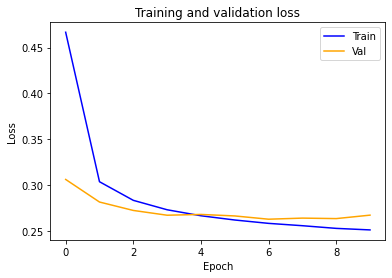

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# CREATE HISTORY OBJECT TO STORE TRAINING RESULTS
# ADD OTHER PARAM FOR VALIDATION DATA
history = model.fit(x_train, y_train, epochs=10, validation_data = [x_test, y_test])
history_dict = history.history
# model.fit(x_train, y_train, epochs=10, validation_data = [x_val, y_val])

# PLOTTING FUNCTION
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

# VISUALIZE MODEL PERFORMANCE
plot(history)

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. It is not necessary to produce plots for this section.

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10, activation='softmax') #10 CLASSES
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9272
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1117 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0764 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9740


[0.08494903892278671, 0.9739999771118164]

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2262 - accuracy: 0.9334
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0964 - accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9837
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9746


[0.08547195792198181, 0.9746000170707703]

### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display both of these images below, the correct labels for them, the predicted labels, and the confidence scores.

In [8]:
#CHOOSING 1 LAYER - 
#BY LAST EPOCH LOSS AND ACCURACY WEREN'T SUPER DIFFERENT
#GIVEN THAT CLOSENESS OF PERFORMANCE AND ADDED COST OF EXTRA LAYER, GOING 1 DEEP

#REDEFINE MODEL SINCE LATEST WAS 2 LAYERS
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2555 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1169 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9860


0.66


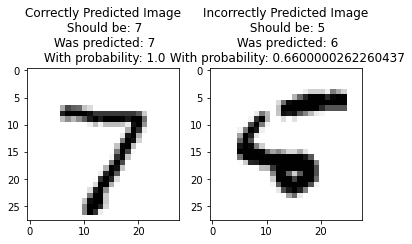

In [9]:
#NEW CELL FOR PART 2 - VISUALIZING A CORRECT AND INCORRECT EXAMPLE
# Next, identify one image from the testing set the model classifies correctly, 
# and another that it classifies incorrectly. 
# Add code to display both of these images below, 
# the correct labels for them, the predicted labels, and the confidence scores.
import numpy as np
preds = model.predict(x_test)
outcomes = [(np.argmax(x), np.max(x)) for x in preds]

correct_preds = []
incorrect_preds = []
for i, outcome in enumerate(outcomes):
  if outcome[0] == y_test[i]:
    correct_preds.append(i)
  else:
    incorrect_preds.append(i)

correct_index = correct_preds[0]
incorrect_index = incorrect_preds[0]

correct_pred = outcomes[correct_index][0]
incorrect_pred = outcomes[incorrect_index][0]

correct_prob = round(outcomes[correct_index][1], 2)
incorrect_prob = round(outcomes[incorrect_index][1], 2)
print(incorrect_prob)

correct_actual = y_test[correct_index]
incorrect_actual = y_test[incorrect_index]

correct_image = x_test[correct_index]
incorrect_image = x_test[incorrect_index]

correct_image *= 255 #UNSCALE FOR GETTING IMAGE
incorrect_image *= 255

f, axarr = plt.subplots(1,2)
axarr[0].imshow(correct_image, cmap = plt.cm.binary)
axarr[0].title.set_text("Correctly Predicted Image\n Should be: {0}\n Was predicted: {1}\n With probability: {2}".format(correct_actual, correct_pred, correct_prob))
axarr[1].imshow(incorrect_image, cmap = plt.cm.binary)
axarr[1].title.set_text("Incorrectly Predicted Image\n Should be: {0}\n Was predicted: {1}\n With probability: {2}".format(incorrect_actual, incorrect_pred, incorrect_prob))

## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/tutorials/quickstart/advanced)
* [TensorFlow basics](https://www.tensorflow.org/guide/basics)
* [Keras overview](https://www.tensorflow.org/guide/keras/overview)
* [Writing custom models](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/guide/data).

In [10]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(6, shape=(), dtype=uint8)


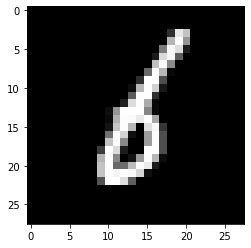

In [11]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

### Define and train a linear model

In [12]:
# SUPER SIMPLE MODEL
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [13]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)
      # Calculate loss
      loss = loss_fn(labels, predictions)
      
    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Epoch 0, Test loss: 0.47816887497901917
Epoch 1, Test loss: 0.39916345477104187
Epoch 2, Test loss: 0.36662888526916504
Epoch 3, Test loss: 0.3475800156593323
Epoch 4, Test loss: 0.3351147770881653


Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to this one from lecture 1:

![Plot of weights](https://storage.googleapis.com/applied-dl/a1-2.png)

**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [14]:
# GET WEIGHTS FROM OUR ONE DENSE LAYER
weights, bias = model.d1.weights
print(weights.shape)

(784, 10)


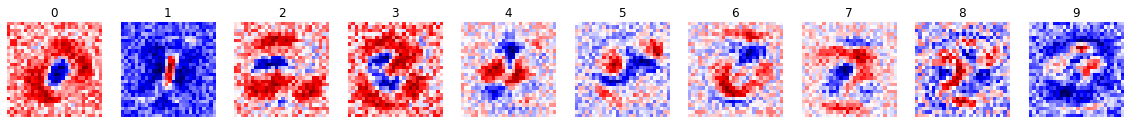

In [15]:
# AND VISUALIZE THEM
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  i_weights = [x[i] for x in weights] 
  img = tf.reshape(i_weights, (28, 28)) 
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition and the call method. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [16]:
# NEW DNN (ADDED HIDDEN LAYER)
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d1 = Dense(16, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyDNN()

In [17]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [18]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [19]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [20]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [21]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 1.7590365409851074, Accuracy: 48.48500061035156, Test Loss: 1.2433587312698364, Test Accuracy: 52.4900016784668
Epoch 2, Loss: 1.1292520761489868, Accuracy: 52.619998931884766, Test Loss: 1.0528744459152222, Test Accuracy: 53.570003509521484
Epoch 3, Loss: 1.0253769159317017, Accuracy: 55.801666259765625, Test Loss: 0.9905306696891785, Test Accuracy: 58.040000915527344
Epoch 4, Loss: 0.9249110817909241, Accuracy: 63.74166488647461, Test Loss: 0.8372895121574402, Test Accuracy: 67.33999633789062
Epoch 5, Loss: 0.7895042896270752, Accuracy: 72.7750015258789, Test Loss: 0.7388616800308228, Test Accuracy: 79.18999481201172


### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [22]:
def my_softmax(x):  
# USE TENSORFLOW FUNCTIONS FOR DEFINING OWN SOFTMAX
  out = tf.exp(x) / tf.reduce_sum(tf.exp(x), axis = -1, keepdims=True)
  return out

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x) #AND IMPLEMENT
  
model = MyModel()



# TRAIN MODEL
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:
      tape.watch(labels)
      # Forward pass
      predictions = model(images)
      
      # Calculate loss
      loss = loss_fn(labels, predictions)
      
    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # print(gradients)
    
    # # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))


Epoch 0, Test loss: 0.4775351583957672
Epoch 1, Test loss: 0.39838728308677673
Epoch 2, Test loss: 0.3656986355781555
Epoch 3, Test loss: 0.3472108840942383
Epoch 4, Test loss: 0.33496788144111633
